In [18]:
### visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#setup a default matplotlib
plt.rc(
    "figure",
    figsize=(12,8),
    titlesize=18,
    titleweight='bold',
    autolayout = True
)

plt.rc(
    "axes",
    labelsize=16,
    labelweight='bold',
    titlesize=16,
    titleweight='bold'
)
plot_params = dict(
    color = '0.75',
    markeredgecolor = '0.25',
    markerfacecolor = '0.25',
    style = '.-',
    legend = False
)

%config InlineBackend.figure_format = 'retina'

# Load the data

df = pd.read_csv('data/tunnel.csv',
parse_dates = ['Day'])

df = df.set_index('Day').to_period()

df.head()


,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


Making a moving average plot of 365days to the trends of our data within a short period since the dates contains days.

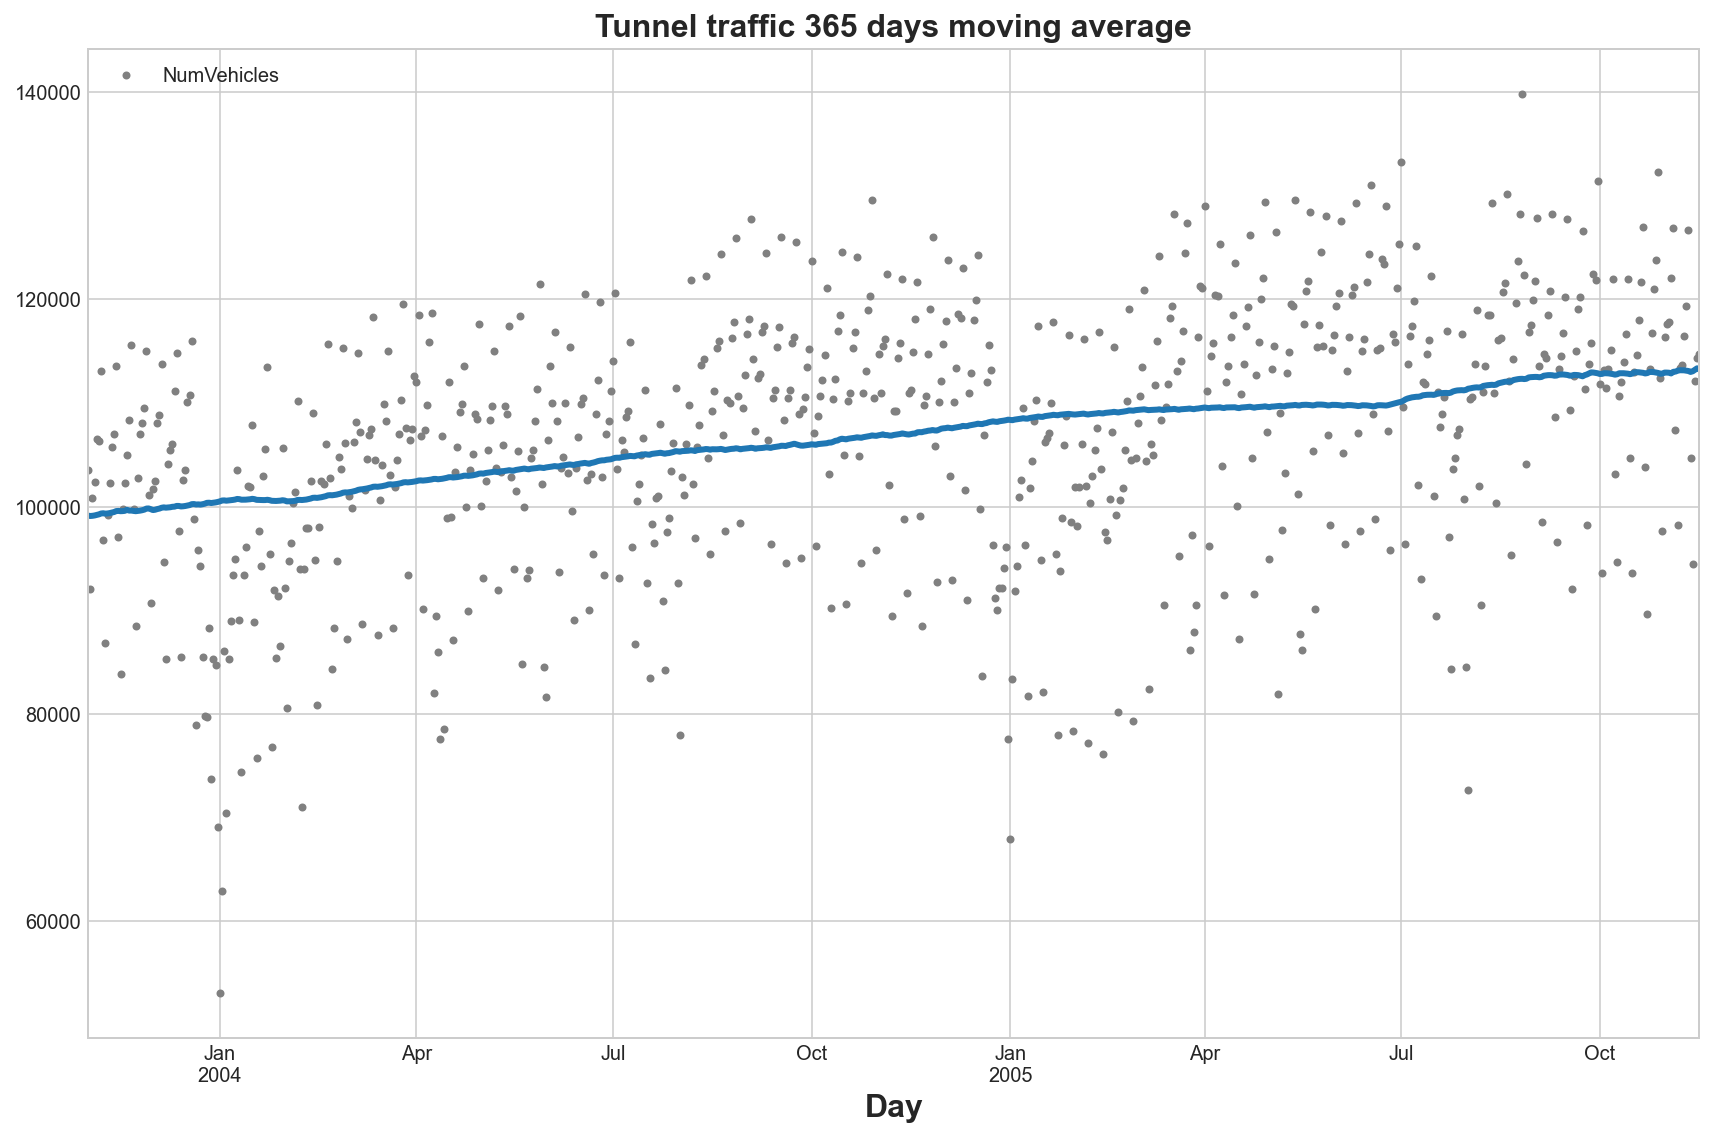

In [3]:
moving_average = df.rolling(window=365, #select the window of the moving average
                            center =True, #put the window at the center
                            min_periods =183, 
).mean()

ax = df.plot(style='.', color ='0.5')
moving_average.plot(
        ax = ax, linewidth=3, title = 'Tunnel traffic 365 days moving average', legend=False
)
plt.show()

In [4]:
from statsmodels.tsa.deterministic import DeterministicProcess
dp = DeterministicProcess(
    index = df.index,
    constant=True,
    drop=True,
    order =1
)

X = dp.in_sample()
X.head()

,const,trend
Day,,
2003-11-01,1.0,1.0
2003-11-02,1.0,2.0
2003-11-03,1.0,3.0
2003-11-04,1.0,4.0
2003-11-05,1.0,5.0


In [5]:
from sklearn.linear_model import LinearRegression

y = df.loc[:, 'NumVehicles']
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [6]:
y_preds = pd.Series(model.predict(X), index= X.index)

Text(0.5, 1.0, 'Tunnel traffic - Linear trend')

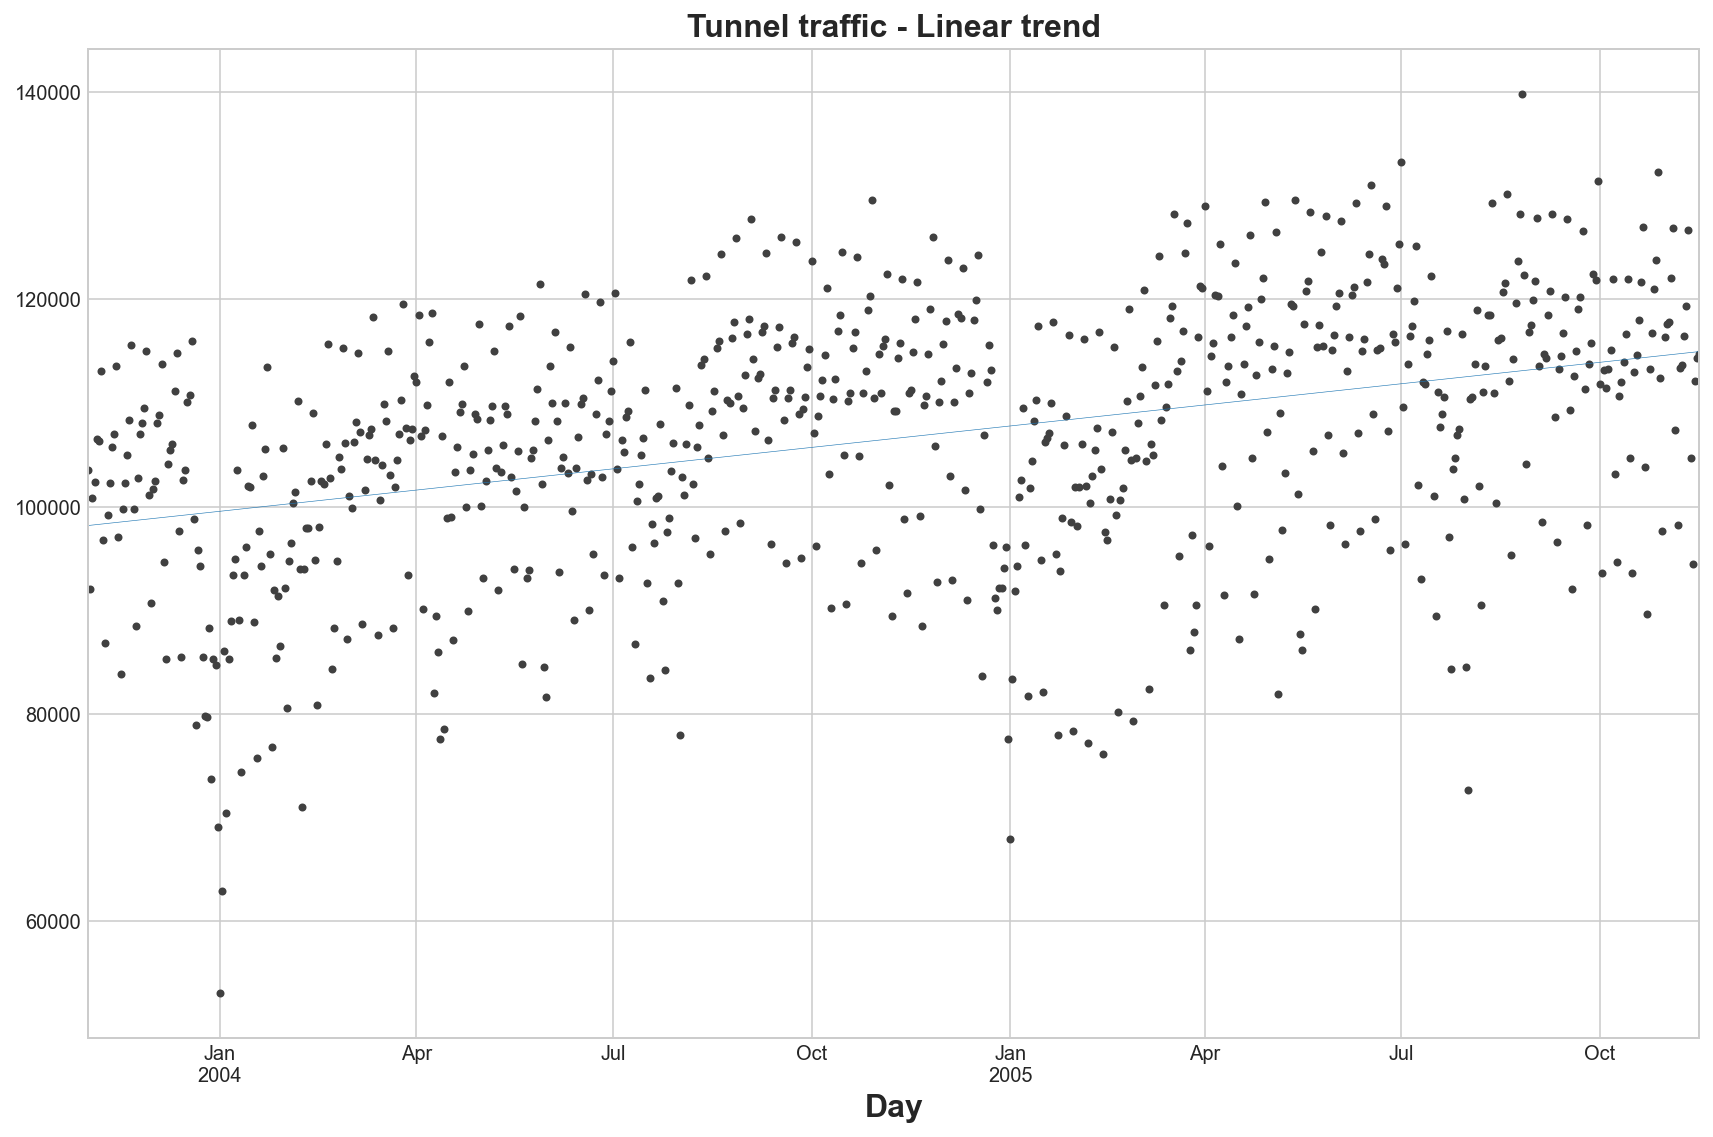

In [11]:
fig, ax = plt.subplots()
ax = y.plot(style ='.',color = "0.25")
y_preds.plot(ax=ax, linewidth=0.3, label=True)
ax.set_title("Tunnel traffic - Linear trend")

To make a forecast, we will be using the `out_of_sample` function.

In [12]:
X = dp.out_of_sample(steps = 30)
X

,const,trend
2005-11-17,1.0,748.0
2005-11-18,1.0,749.0
2005-11-19,1.0,750.0
2005-11-20,1.0,751.0
2005-11-21,1.0,752.0
2005-11-22,1.0,753.0
2005-11-23,1.0,754.0
2005-11-24,1.0,755.0
2005-11-25,1.0,756.0
2005-11-26,1.0,757.0


In [13]:
y_fore = pd.Series(model.predict(X), index = X.index)
y_fore

2005-11-17    114981.801146
2005-11-18    115004.298595
2005-11-19    115026.796045
2005-11-20    115049.293494
2005-11-21    115071.790944
2005-11-22    115094.288393
2005-11-23    115116.785843
2005-11-24    115139.283292
2005-11-25    115161.780742
2005-11-26    115184.278191
2005-11-27    115206.775641
2005-11-28    115229.273090
2005-11-29    115251.770540
2005-11-30    115274.267990
2005-12-01    115296.765439
2005-12-02    115319.262889
2005-12-03    115341.760338
2005-12-04    115364.257788
2005-12-05    115386.755237
2005-12-06    115409.252687
2005-12-07    115431.750136
2005-12-08    115454.247586
2005-12-09    115476.745035
2005-12-10    115499.242485
2005-12-11    115521.739934
2005-12-12    115544.237384
2005-12-13    115566.734833
2005-12-14    115589.232283
2005-12-15    115611.729733
2005-12-16    115634.227182
Freq: D, dtype: float64

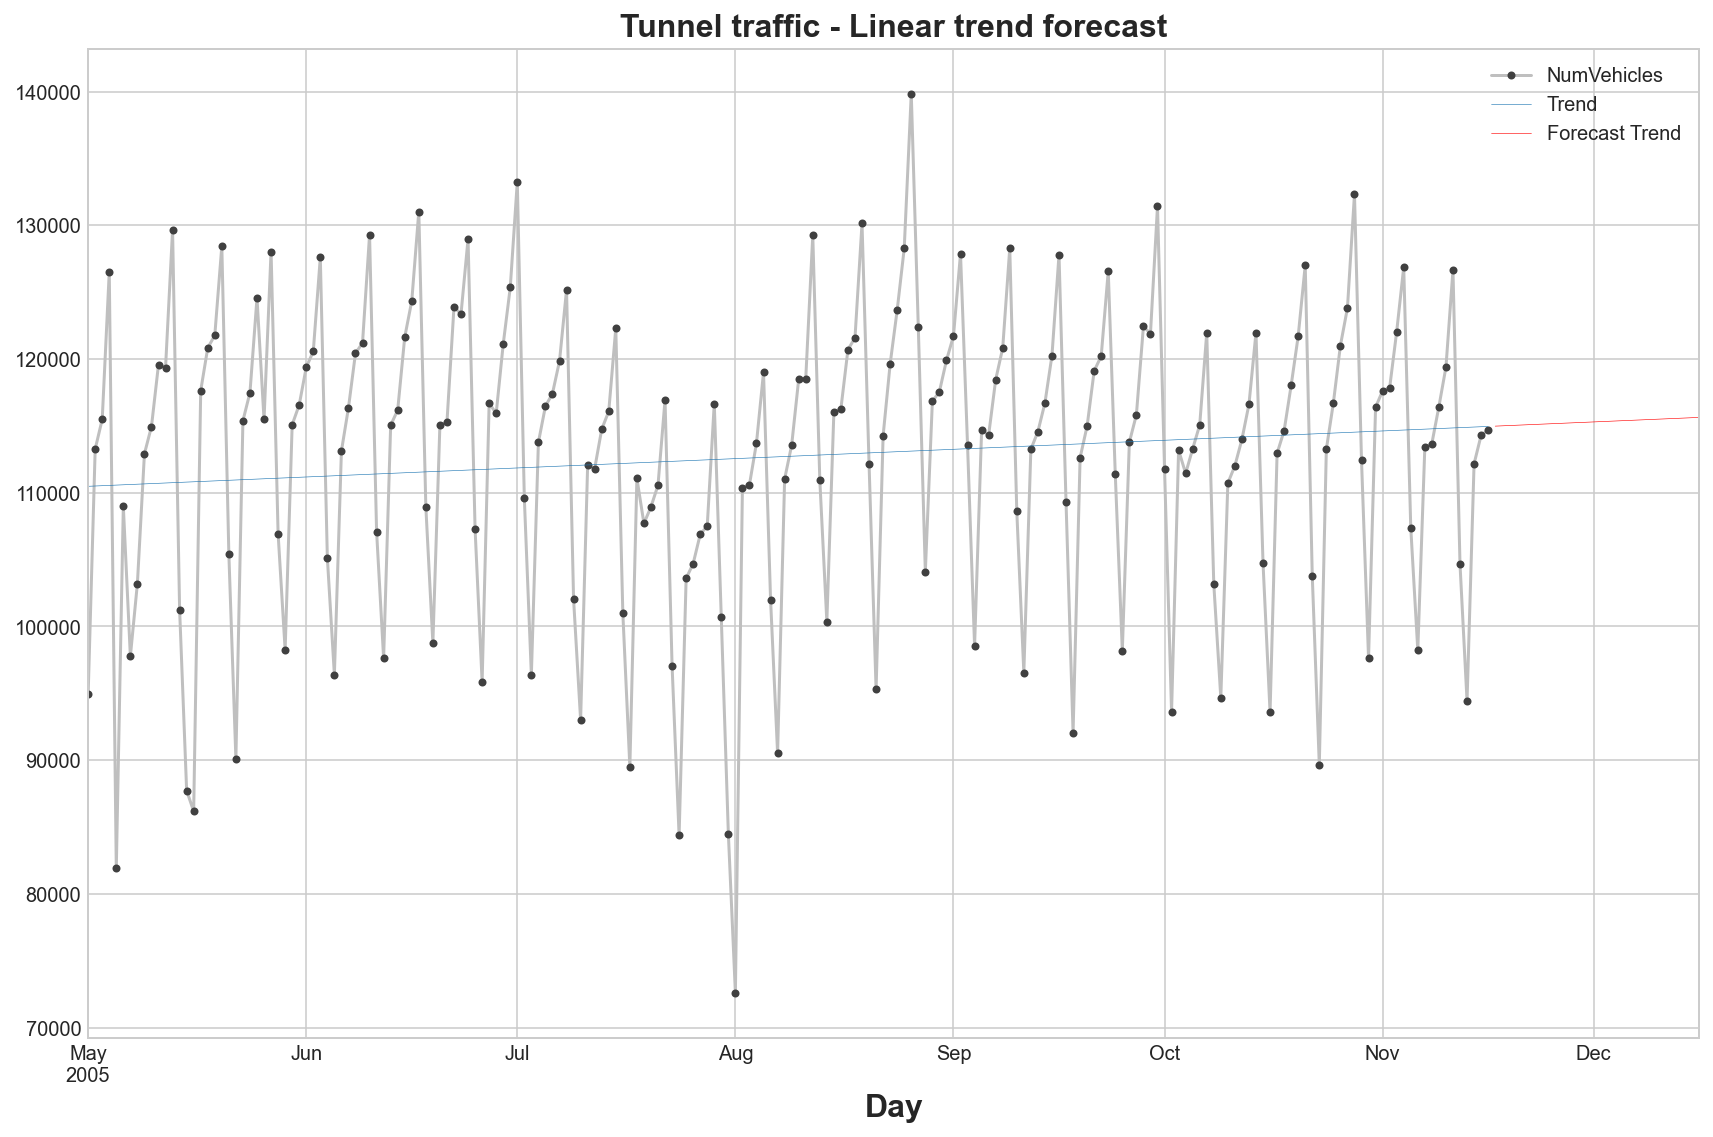

In [21]:
ax = df['2005-05' :].plot(**plot_params, title = "Tunnel traffic - Linear trend forecast")
ax = y_preds['2005-05' :].plot(ax = ax, linewidth = 0.3, label = 'Trend')
ax = y_fore.plot(ax = ax, linewidth =0.3, label = "Forecast Trend", color = 'red')
_= ax.legend()